In [9]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

In [10]:
numpy_array = np.genfromtxt("Dataset3.csv", delimiter=",")
X = numpy_array[:999][:]
test = numpy_array[999:][:]
#numpy_array = np.array(df_csv)
#print(X)
print(X.shape)
print(test.shape)
# arr1 = np.array([2,3,1])
# arr2 = np.array([[1,2,3],[4,5,6],[7,8,9]])
# arr1inds = arr1.argsort()
# sorted_arr1 = arr1[arr1inds[::-1]]
# sorted_arr2 = arr2[arr1inds[::-1]]
# print(sorted_arr1)
# print(sorted_arr2)

(999, 2)
(1, 2)


In [11]:
#Kernel matrix
#K = np.power(1+X.dot(X.T),2)
#K = np.power(1+X.dot(X.T),3)

#Exponential kernel
# k1 = np.zeros((999,999),dtype=float)

# for i in range(len(X)):
#     for j in range(len(X)):
#         k1[]
    
k_new = np.divide(X.dot(X.T),2*pow(0.5,2))
K = np.exp(-k_new)

In [12]:
#Eigen values and vectors
e_val,e_vec = eig(K)
print("Eigen values :")
print(e_val.shape)
print("Eigen vectors :")
print(e_vec.shape)

Eigen values :
(999,)
Eigen vectors :
(999, 999)


In [13]:
#How to do scaling?
#Take top 2 eigen vectors corresponding to top eigen values
alpha1 = []

arr1inds = e_val.argsort()
sorted_e_val = e_val[arr1inds[::-1]]
sorted_e_vec = e_vec[arr1inds[::-1]]
#print(sorted_e_val.shape)

#print(sorted_e_val)
#print(sorted_e_vec)

for i in range(2):
    alpha1.append(sorted_e_vec[i])
# alpha1 = np.append(alpha1,sorted_e_vec[0])
# alpha2 = np.append(alpha2,sorted_e_vec[1])

# for i in range(2):
#     W = np.where(e_val == np.amax(e_val))
#     index.append(W[0][0])
#     alpha = np.append(alpha,np.array(e_vec[W]),axis=0)
#     a = np.delete(e_val,index)
#print(a)
#print(e_val.shape,e_vec.shape)
#print(alpha1)

In [14]:
prComp = []
for a in range(len(alpha1)):
    #print(a)
    sum = np.zeros(999,dtype=float)
    #print(alpha1[a])
    for x in X:
        sum = sum + (alpha1[a]*(test[0].dot(x.T)))
    prComp.append(sum)
prComp = np.array(prComp)
print(prComp)

[[-6.62782849e-18+0.00000000e+00j  6.62782915e-18+0.00000000e+00j
  -1.07145591e-16+0.00000000e+00j ... -3.28507063e-13+4.89582615e-13j
  -3.28507063e-13-4.89582615e-13j -5.20625286e-14+0.00000000e+00j]
 [-2.09781572e-15+0.00000000e+00j  2.09782217e-15+0.00000000e+00j
   4.12236244e-16+0.00000000e+00j ...  1.59549420e-11-3.36930475e-12j
   1.59549420e-11+3.36930475e-12j -1.09367535e-11+0.00000000e+00j]]


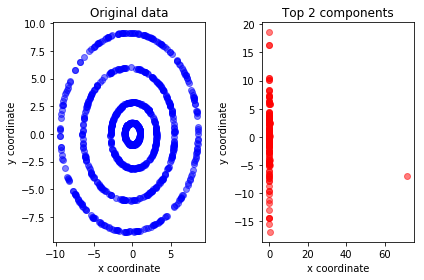

In [15]:
plt.subplot(1, 2, 1)
plt.scatter(X[:,0],X[:,1], color='blue', alpha=0.5)
plt.title('Original data')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.subplot(1, 2, 2)
plt.scatter(prComp[0],prComp[1], color='red', alpha=0.5)
plt.title('Top 2 components')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.tight_layout()
plt.show()